<a href="https://colab.research.google.com/github/tsholofelo-mokheleli/ACIS-2023-New-Zealand/blob/main/Experiment_III.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Libraries**

In [141]:
# Load the libraries
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Warning filter
import warnings
warnings.filterwarnings('ignore')
cmap=sns.color_palette('Blues_r')

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from scipy.stats import ks_2samp

# Imputation
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import KNNImputer

# Plot Theme
sns.set_style("darkgrid")
plt.style.use("seaborn-deep")

### **Load Data**

In [142]:
data = pd.read_csv("Clean Mental Health.csv")

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   self_employed             3269 non-null   int64  
 1   no_employees              2723 non-null   float64
 2   tech_company              2723 non-null   float64
 3   company_role              1840 non-null   float64
 4   benefits                  2723 non-null   float64
 5   care_options              2427 non-null   float64
 6   wellness_program          2723 non-null   float64
 7   seek_help                 2723 non-null   float64
 8   anonymity                 2723 non-null   float64
 9   leave                     2723 non-null   float64
 10  mental_importance         2723 non-null   float64
 11  neg_consequence_coworker  2980 non-null   float64
 12  discuss_mh                1859 non-null   float64
 13  work_interfere            546 non-null    float64
 14  coworker

In [144]:
# for column in data.columns:
#     unique_values = data[column].unique()
#     print(f"Unique values in '{column}': {unique_values}")

In [145]:
#Get the numbers of missing values in each column
missing = data.isnull().sum()

#Get the percentage of missing values in each column
missing_pct = round(data.isnull().sum()/len(data) * 100, 1)

orig_data_missing = pd.concat([missing, missing_pct], axis=1)
orig_data_missing.columns = ["Num", "%"]
print(orig_data_missing)

                           Num     %
self_employed                0   0.0
no_employees               546  16.7
tech_company               546  16.7
company_role              1429  43.7
benefits                   546  16.7
care_options               842  25.8
wellness_program           546  16.7
seek_help                  546  16.7
anonymity                  546  16.7
leave                      546  16.7
mental_importance          546  16.7
neg_consequence_coworker   289   8.8
discuss_mh                1410  43.1
work_interfere            2723  83.3
coworkers                  428  13.1
supervisor                 428  13.1
mental_health_interview      0   0.0
family_history               0   0.0
past_mental_health          23   0.7
mental_health                0   0.0
mental_health_diagnosed   1080  33.0
treatment                    0   0.0
age                         10   0.3
gender                       0   0.0
country                      0   0.0


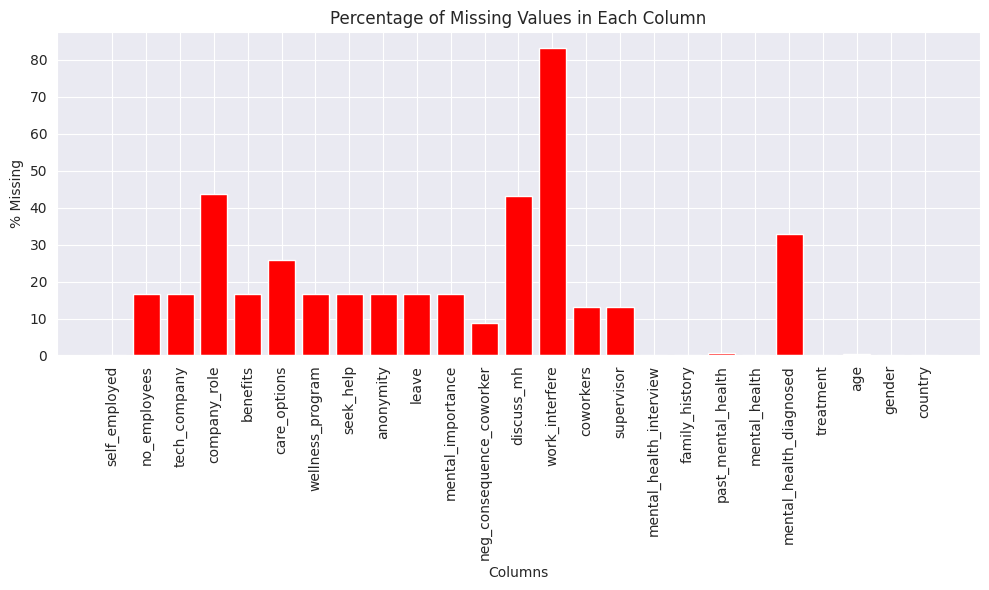

In [146]:
# Create a bar plot to visualize the missing values
plt.figure(figsize=(10, 6))
plt.bar(orig_data_missing.index, orig_data_missing["%"], color='red')
plt.xlabel("Columns")
plt.ylabel("% Missing")
plt.title("Percentage of Missing Values in Each Column")
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

In [147]:
orig_data = data

orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   self_employed             3269 non-null   int64  
 1   no_employees              2723 non-null   float64
 2   tech_company              2723 non-null   float64
 3   company_role              1840 non-null   float64
 4   benefits                  2723 non-null   float64
 5   care_options              2427 non-null   float64
 6   wellness_program          2723 non-null   float64
 7   seek_help                 2723 non-null   float64
 8   anonymity                 2723 non-null   float64
 9   leave                     2723 non-null   float64
 10  mental_importance         2723 non-null   float64
 11  neg_consequence_coworker  2980 non-null   float64
 12  discuss_mh                1859 non-null   float64
 13  work_interfere            546 non-null    float64
 14  coworker

In [148]:
orig_data = orig_data.drop(["mental_health_diagnosed"], axis=1)

orig_incomplete = orig_data

print(orig_incomplete.shape)
print()
orig_incomplete.info()

(3269, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   self_employed             3269 non-null   int64  
 1   no_employees              2723 non-null   float64
 2   tech_company              2723 non-null   float64
 3   company_role              1840 non-null   float64
 4   benefits                  2723 non-null   float64
 5   care_options              2427 non-null   float64
 6   wellness_program          2723 non-null   float64
 7   seek_help                 2723 non-null   float64
 8   anonymity                 2723 non-null   float64
 9   leave                     2723 non-null   float64
 10  mental_importance         2723 non-null   float64
 11  neg_consequence_coworker  2980 non-null   float64
 12  discuss_mh                1859 non-null   float64
 13  work_interfere            546 non-null    float64
 

### **Initial Data Imputation**

In [149]:
columns_to_impute = data.columns[data.columns != "mental_health_diagnosed"]

# Impute NaN values with -1 in the selected columns
data[columns_to_impute] = data[columns_to_impute].fillna(-1)

In [150]:
# Get the numbers of missing values in each column
missing = data.isnull().sum()

# Get the percentage of complete (non-missing) values in each column
complete_pct = round((1 - (data.isnull().sum() / len(data))) * 100, 1)

# Create a DataFrame to display the results
data_complete = pd.concat([missing, complete_pct], axis=1)
data_complete.columns = ["Num Missing", "% Complete"]
print(data_complete)

                          Num Missing  % Complete
self_employed                       0       100.0
no_employees                        0       100.0
tech_company                        0       100.0
company_role                        0       100.0
benefits                            0       100.0
care_options                        0       100.0
wellness_program                    0       100.0
seek_help                           0       100.0
anonymity                           0       100.0
leave                               0       100.0
mental_importance                   0       100.0
neg_consequence_coworker            0       100.0
discuss_mh                          0       100.0
work_interfere                      0       100.0
coworkers                           0       100.0
supervisor                          0       100.0
mental_health_interview             0       100.0
family_history                      0       100.0
past_mental_health                  0       100.0


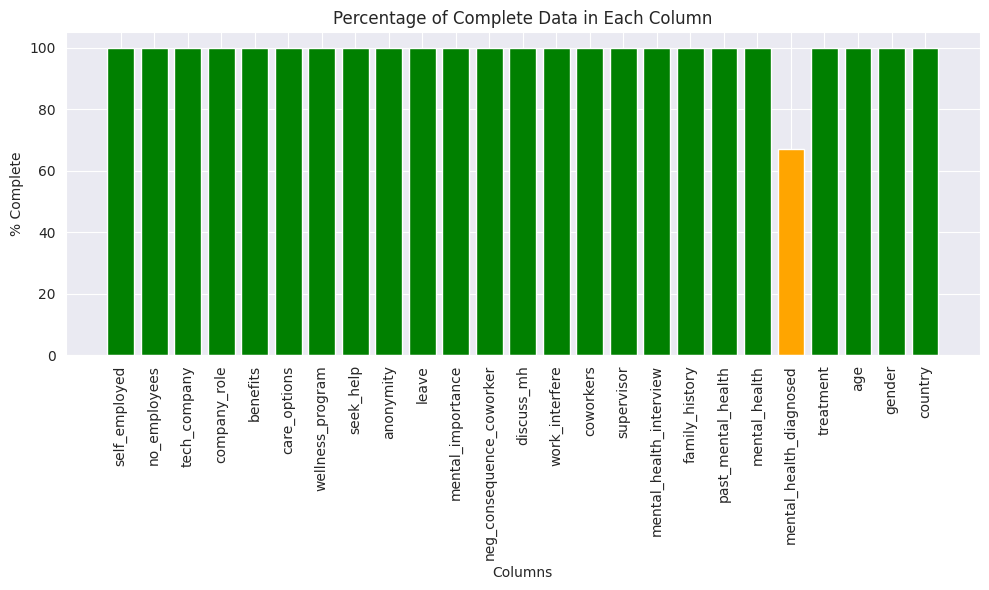

In [151]:
# Create a list of colors based on the percentage of complete data
colors = ['green' if pct == 100 else 'orange' for pct in data_complete["% Complete"]]

# Create a bar plot to visualize the percentage of complete data
plt.figure(figsize=(10, 6))
plt.bar(data_complete.index, data_complete["% Complete"], color=colors)
plt.xlabel("Columns")
plt.ylabel("% Complete")
plt.title("Percentage of Complete Data in Each Column")
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

In [152]:
data = data.drop(["mental_health_diagnosed"], axis=1)

# Convert all columns to int data type
for column in data.columns:
    data[column] = data[column].astype('int64')


incomplete = data
incomplete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   self_employed             3269 non-null   int64
 1   no_employees              3269 non-null   int64
 2   tech_company              3269 non-null   int64
 3   company_role              3269 non-null   int64
 4   benefits                  3269 non-null   int64
 5   care_options              3269 non-null   int64
 6   wellness_program          3269 non-null   int64
 7   seek_help                 3269 non-null   int64
 8   anonymity                 3269 non-null   int64
 9   leave                     3269 non-null   int64
 10  mental_importance         3269 non-null   int64
 11  neg_consequence_coworker  3269 non-null   int64
 12  discuss_mh                3269 non-null   int64
 13  work_interfere            3269 non-null   int64
 14  coworkers                 3269 non-null 

### **Mode Imputation**

In [153]:
data = pd.read_csv("Clean Mental Health.csv")

In [154]:
columns_to_impute = data.columns[data.columns != "mental_health_diagnosed"]

# Iterate through columns to impute missing values with mode
for column in columns_to_impute:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   self_employed             3269 non-null   int64  
 1   no_employees              3269 non-null   float64
 2   tech_company              3269 non-null   float64
 3   company_role              3269 non-null   float64
 4   benefits                  3269 non-null   float64
 5   care_options              3269 non-null   float64
 6   wellness_program          3269 non-null   float64
 7   seek_help                 3269 non-null   float64
 8   anonymity                 3269 non-null   float64
 9   leave                     3269 non-null   float64
 10  mental_importance         3269 non-null   float64
 11  neg_consequence_coworker  3269 non-null   float64
 12  discuss_mh                3269 non-null   float64
 13  work_interfere            3269 non-null   float64
 14  coworker

In [155]:
data = data.drop(["mental_health_diagnosed"], axis=1)

# Convert all columns to int data type
for column in data.columns:
    data[column] = data[column].astype('int64')


mode_imputed = data
mode_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   self_employed             3269 non-null   int64
 1   no_employees              3269 non-null   int64
 2   tech_company              3269 non-null   int64
 3   company_role              3269 non-null   int64
 4   benefits                  3269 non-null   int64
 5   care_options              3269 non-null   int64
 6   wellness_program          3269 non-null   int64
 7   seek_help                 3269 non-null   int64
 8   anonymity                 3269 non-null   int64
 9   leave                     3269 non-null   int64
 10  mental_importance         3269 non-null   int64
 11  neg_consequence_coworker  3269 non-null   int64
 12  discuss_mh                3269 non-null   int64
 13  work_interfere            3269 non-null   int64
 14  coworkers                 3269 non-null 

### **Multiple Imputation**

In [156]:
data = pd.read_csv("Clean Mental Health.csv")

In [157]:
# Initialize the MICE imputer
mice_imputer = IterativeImputer()

# Exclude the 'mental_health_diagnosed' column from imputation
columns_to_impute = [col for col in data.columns if col != 'mental_health_diagnosed']

# Perform MICE imputation on the selected columns
data[columns_to_impute] = mice_imputer.fit_transform(data[columns_to_impute])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   self_employed             3269 non-null   float64
 1   no_employees              3269 non-null   float64
 2   tech_company              3269 non-null   float64
 3   company_role              3269 non-null   float64
 4   benefits                  3269 non-null   float64
 5   care_options              3269 non-null   float64
 6   wellness_program          3269 non-null   float64
 7   seek_help                 3269 non-null   float64
 8   anonymity                 3269 non-null   float64
 9   leave                     3269 non-null   float64
 10  mental_importance         3269 non-null   float64
 11  neg_consequence_coworker  3269 non-null   float64
 12  discuss_mh                3269 non-null   float64
 13  work_interfere            3269 non-null   float64
 14  coworker

In [158]:
data = data.drop(["mental_health_diagnosed"], axis=1)

# Convert all columns to int data type
for column in data.columns:
    data[column] = data[column].astype('int64')


mice_imputed = data
mice_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   self_employed             3269 non-null   int64
 1   no_employees              3269 non-null   int64
 2   tech_company              3269 non-null   int64
 3   company_role              3269 non-null   int64
 4   benefits                  3269 non-null   int64
 5   care_options              3269 non-null   int64
 6   wellness_program          3269 non-null   int64
 7   seek_help                 3269 non-null   int64
 8   anonymity                 3269 non-null   int64
 9   leave                     3269 non-null   int64
 10  mental_importance         3269 non-null   int64
 11  neg_consequence_coworker  3269 non-null   int64
 12  discuss_mh                3269 non-null   int64
 13  work_interfere            3269 non-null   int64
 14  coworkers                 3269 non-null 

### **Hot Deck Imputation**

In [159]:
data = pd.read_csv("Clean Mental Health.csv")

In [160]:
columns_to_impute = data.columns[data.columns != "mental_health_diagnosed"]
imputed_data = data.copy()

# Iterate through columns to impute missing values with mode
for column in columns_to_impute:
  vars_to_impute = [column]

  for var in vars_to_impute:
      # Create a donor pool consisting of cases without missing values for the current variable
      donor_pool = imputed_data.dropna(subset=[var])

      # Iterate over each case with a missing value for the current variable
      for index, row in imputed_data[imputed_data[var].isnull()].iterrows():
          # Check if there are any donor cases available
          if not donor_pool.empty:
              # Find the closest donor case based on a chosen similarity measure
              similarity_scores = np.abs(donor_pool[vars_to_impute] - row[vars_to_impute])
              closest_donor = donor_pool.iloc[similarity_scores.sum(axis=1).idxmin()]

              # Impute the missing value with the value from the closest donor case
              imputed_data.at[index, var] = closest_donor[var]
          else:
              # Handle the case where there are no donor cases available
              # You can choose to skip imputation or use another imputation method
              imputed_data.at[index, var] = np.nan  # or any other imputation approach

data = imputed_data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   self_employed             3269 non-null   int64  
 1   no_employees              3269 non-null   float64
 2   tech_company              3269 non-null   float64
 3   company_role              3269 non-null   float64
 4   benefits                  3269 non-null   float64
 5   care_options              3269 non-null   float64
 6   wellness_program          3269 non-null   float64
 7   seek_help                 3269 non-null   float64
 8   anonymity                 3269 non-null   float64
 9   leave                     3269 non-null   float64
 10  mental_importance         3269 non-null   float64
 11  neg_consequence_coworker  3269 non-null   float64
 12  discuss_mh                3269 non-null   float64
 13  work_interfere            3269 non-null   float64
 14  coworker

In [161]:
data = data.drop(["mental_health_diagnosed"], axis=1)

# Convert all columns to int data type
for column in data.columns:
    data[column] = data[column].astype('int64')


hotdeck_imputed = data
hotdeck_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   self_employed             3269 non-null   int64
 1   no_employees              3269 non-null   int64
 2   tech_company              3269 non-null   int64
 3   company_role              3269 non-null   int64
 4   benefits                  3269 non-null   int64
 5   care_options              3269 non-null   int64
 6   wellness_program          3269 non-null   int64
 7   seek_help                 3269 non-null   int64
 8   anonymity                 3269 non-null   int64
 9   leave                     3269 non-null   int64
 10  mental_importance         3269 non-null   int64
 11  neg_consequence_coworker  3269 non-null   int64
 12  discuss_mh                3269 non-null   int64
 13  work_interfere            3269 non-null   int64
 14  coworkers                 3269 non-null 

### **K-Nearest Neighbors Imputation**

In [162]:
data = pd.read_csv("Clean Mental Health.csv")

In [163]:
target_column = 'mental_health_diagnosed'
y = data[target_column]

# Remove the target column from the DataFrame for imputation
X = data.drop(columns=[target_column])

# Perform KNN imputation
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
X_imputed = imputer.fit_transform(X)

# Convert the imputed array back to a DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Combine the imputed data with the target column
data_imputed = pd.concat([X_imputed_df, y], axis=1)

data = data_imputed
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   self_employed             3269 non-null   float64
 1   no_employees              3269 non-null   float64
 2   tech_company              3269 non-null   float64
 3   company_role              3269 non-null   float64
 4   benefits                  3269 non-null   float64
 5   care_options              3269 non-null   float64
 6   wellness_program          3269 non-null   float64
 7   seek_help                 3269 non-null   float64
 8   anonymity                 3269 non-null   float64
 9   leave                     3269 non-null   float64
 10  mental_importance         3269 non-null   float64
 11  neg_consequence_coworker  3269 non-null   float64
 12  discuss_mh                3269 non-null   float64
 13  work_interfere            3269 non-null   float64
 14  coworker

In [164]:
data = data.drop(["mental_health_diagnosed"], axis=1)

# Convert all columns to int data type
for column in data.columns:
    data[column] = data[column].astype('int64')


knn_imputed = data
knn_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   self_employed             3269 non-null   int64
 1   no_employees              3269 non-null   int64
 2   tech_company              3269 non-null   int64
 3   company_role              3269 non-null   int64
 4   benefits                  3269 non-null   int64
 5   care_options              3269 non-null   int64
 6   wellness_program          3269 non-null   int64
 7   seek_help                 3269 non-null   int64
 8   anonymity                 3269 non-null   int64
 9   leave                     3269 non-null   int64
 10  mental_importance         3269 non-null   int64
 11  neg_consequence_coworker  3269 non-null   int64
 12  discuss_mh                3269 non-null   int64
 13  work_interfere            3269 non-null   int64
 14  coworkers                 3269 non-null 

### **Evaluations**

#### **1. Preservation of relationships**

In [165]:
orig_incomplete = orig_incomplete.corr()

mode_complete_corr = mode_imputed.corr()
mice_complete_corr = mice_imputed.corr()
hd_complete_corr = hotdeck_imputed.corr()
knn_complete_corr = knn_imputed.corr()

mode_complete_corr_diff = np.abs(orig_incomplete - mode_complete_corr)
mice_complete_corr_diff = np.abs(orig_incomplete - mice_complete_corr)
hd_complete_corr_diff = np.abs(orig_incomplete - hd_complete_corr)
knn_complete_corr_diff = np.abs(orig_incomplete - knn_complete_corr)

mode_average_diff = mode_complete_corr_diff.mean().mean()
mice_average_diff = mice_complete_corr_diff.mean().mean()
hd_average_diff = hd_complete_corr_diff.mean().mean()
knn_average_diff = knn_complete_corr_diff .mean().mean()

print("Mode Average difference in correlation matrices:", mode_average_diff)
print("Mice Average difference in correlation matrices:", mice_average_diff)
print("Hot Deck Average difference in correlation matrices:", hd_average_diff)
print("KNN Average difference in correlation matrices:", knn_average_diff)

Mode Average difference in correlation matrices: 0.03729250758778035
Mice Average difference in correlation matrices: 0.039580235292611544
Hot Deck Average difference in correlation matrices: 0.05131635614342911
KNN Average difference in correlation matrices: 0.025685127671372893


#### **2. Mean Absolute Error**

- The **Mean Squared Error (MSE)** calculation can be used to assess the quality of imputation methods when the original data has missing values.

In [166]:
imputation_methods = ["Mode", "MICE", "Hot Deck", "KNN"]
imputed_datasets = [mode_imputed, mice_imputed, hotdeck_imputed, knn_imputed]

for method, imputed_data in zip(imputation_methods, imputed_datasets):
    squared_diffs = (imputed_data - incomplete) ** 2

    mse = np.nanmean(squared_diffs)

    print(f"{method} Imputation MSE:", mse)

Mode Imputation MSE: 1.0226751300091772
MICE Imputation MSE: 0.6884750688283879
Hot Deck Imputation MSE: 1.2657285612317732
KNN Imputation MSE: 0.7068930355868257


#### **3. Root Mean Squared Error**

In [167]:
# Define a function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate RMSE for each dataset
mode_rmse = rmse(incomplete, mode_imputed)
multiple_rmse = rmse(incomplete, mice_imputed)
hot_deck_rmse = rmse(incomplete, hotdeck_imputed)
knn_rmse = rmse(incomplete, knn_imputed)

print("Mode Imputation RMSE:", mode_rmse)
print("Mice Imputation RMSE:", multiple_rmse)
print("Hot Deck Imputation RMSE:", hot_deck_rmse)
print("KNN Imputation RMSE:", knn_rmse)

Mode Imputation RMSE: 1.0112740133164588
Mice Imputation RMSE: 0.8297439778801579
Hot Deck Imputation RMSE: 1.1250460262726025
KNN Imputation RMSE: 0.840769311753721
